## Beer Production


Forecasting the beer prices

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings

In [47]:
brewing_raw = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-31/brewing_materials.csv')

In [3]:
brewing_raw.head()

,data_type,material_type,year,month,type,month_current,month_prior_year,ytd_current,ytd_prior_year
0,Pounds of Materials Used,Grain Products,2008,1,Malt and malt products,374165152,365300134,374165152.0,365300134.0
1,Pounds of Materials Used,Grain Products,2008,1,Corn and corn products,57563519,41647092,57563519.0,41647092.0
2,Pounds of Materials Used,Grain Products,2008,1,Rice and rice products,72402143,81050102,72402143.0,81050102.0
3,Pounds of Materials Used,Grain Products,2008,1,Barley and barley products,3800844,2362162,3800844.0,2362162.0
4,Pounds of Materials Used,Grain Products,2008,1,Wheat and wheat products,1177186,1195381,1177186.0,1195381.0


In [15]:
brewing_raw.shape

(1440, 9)

In [4]:
brewing_raw.describe()

,year,month,month_current,month_prior_year,ytd_current,ytd_prior_year
count,1440.000000,1440.000000,1.440000e+03,1.440000e+03,1.008000e+03,1.008000e+03
mean,2012.500000,6.500000,1.115823e+08,1.908309e+08,9.285083e+08,9.416776e+08
std,2.873279,3.453252,1.790831e+08,5.298138e+08,1.524014e+09,1.549125e+09
min,2008.000000,1.000000,0.000000e+00,0.000000e+00,2.714050e+05,2.714050e+05
25%,2010.000000,3.750000,1.682829e+06,2.396200e+06,2.836642e+07,2.572750e+07
50%,2012.500000,6.500000,1.382096e+07,4.686639e+07,2.345859e+08,2.345861e+08
75%,2015.000000,9.250000,8.451318e+07,1.145321e+08,8.431437e+08,8.498092e+08
max,2017.000000,12.000000,6.565965e+08,6.395439e+09,7.046705e+09,7.143917e+09


In [5]:
brewing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 9 columns):
data_type           1440 non-null object
material_type       1440 non-null object
year                1440 non-null int64
month               1440 non-null int64
type                1440 non-null object
month_current       1440 non-null int64
month_prior_year    1440 non-null int64
ytd_current         1008 non-null float64
ytd_prior_year      1008 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 101.4+ KB


In [9]:
brewing_raw['data_type'].unique()

array(['Pounds of Materials Used'], dtype=object)

In [10]:
brewing_raw['material_type'].unique()

array(['Grain Products', 'Total Grain products', 'Non-Grain Products',
       'Total Non-Grain products', 'Total Used'], dtype=object)

In [12]:
brewing_raw['material_type'].value_counts()

Grain Products              600
Non-Grain Products          480
Total Grain products        120
Total Used                  120
Total Non-Grain products    120
Name: material_type, dtype: int64

In [11]:
brewing_raw['type'].unique()

array(['Malt and malt products', 'Corn and corn products',
       'Rice and rice products', 'Barley and barley products',
       'Wheat and wheat products', 'Total Grain products',
       'Sugar and syrups', 'Hops (dry)', 'Hops (used as extracts)',
       'Other', 'Total Non-Grain products', 'Total Used'], dtype=object)

In [13]:
brewing_raw['type'].value_counts()

Hops (used as extracts)       120
Wheat and wheat products      120
Total Grain products          120
Sugar and syrups              120
Total Used                    120
Corn and corn products        120
Barley and barley products    120
Malt and malt products        120
Total Non-Grain products      120
Rice and rice products        120
Other                         120
Hops (dry)                    120
Name: type, dtype: int64

In [16]:
brewing_raw['year'].value_counts()

2017    144
2016    144
2015    144
2014    144
2013    144
2012    144
2011    144
2010    144
2009    144
2008    144
Name: year, dtype: int64

In [17]:
brewing_raw['month'].value_counts()

12    120
11    120
10    120
9     120
8     120
7     120
6     120
5     120
4     120
3     120
2     120
1     120
Name: month, dtype: int64

We will use `catplot()` on `year` and `ytd_current` and *facet* them by `type`. 

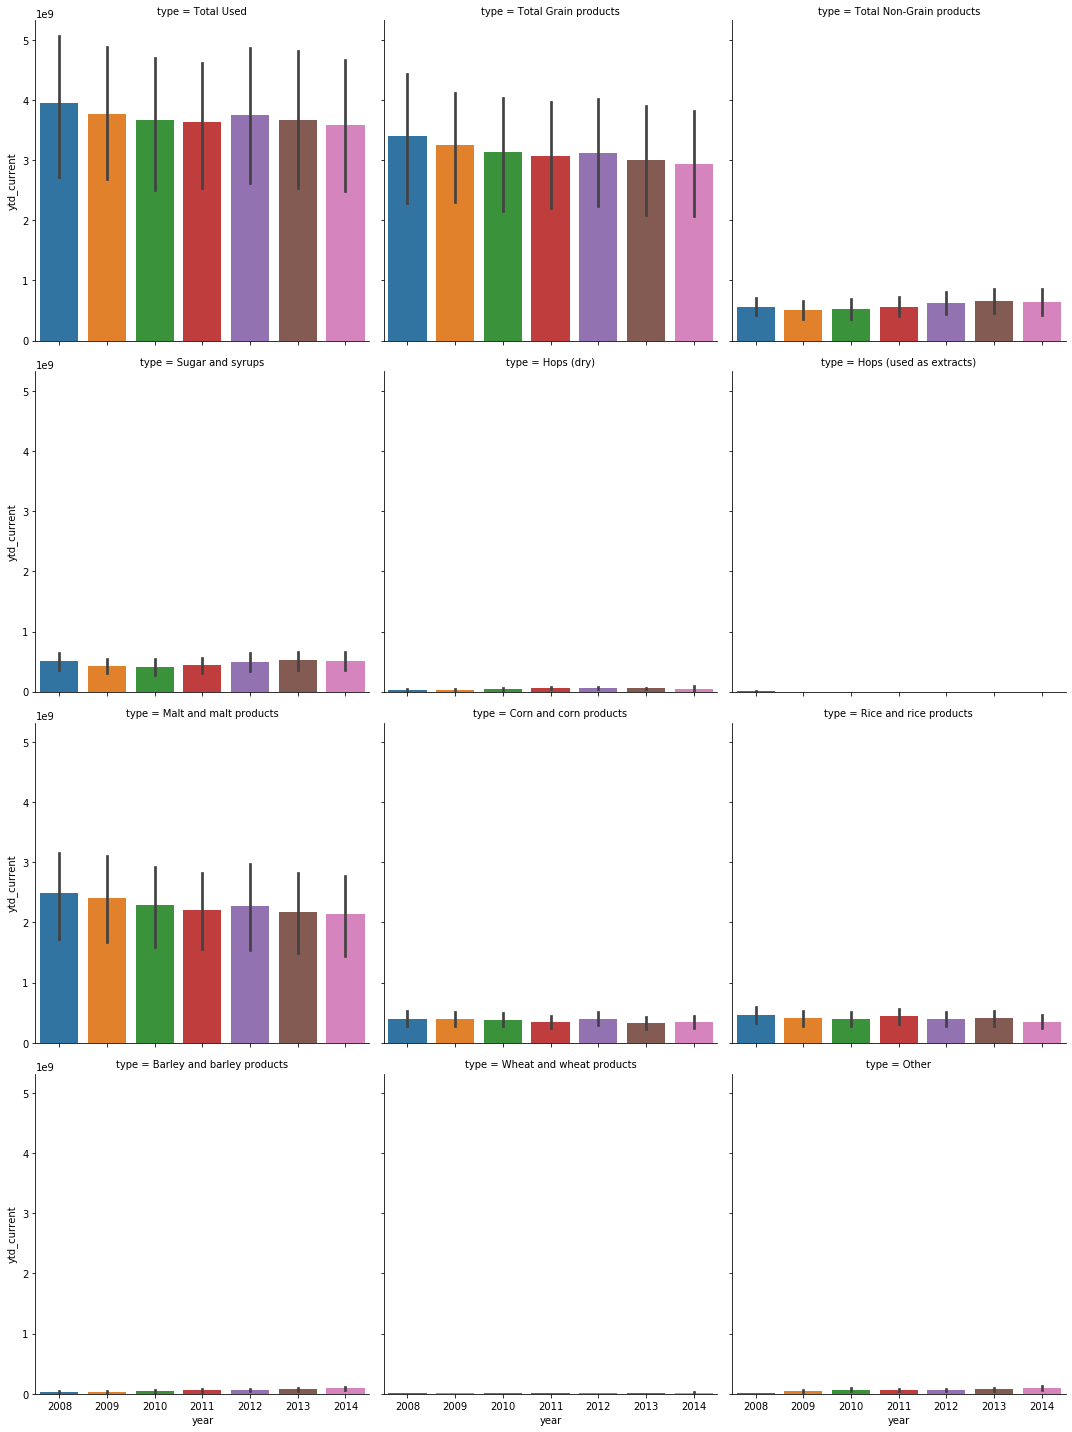

In [33]:
g = sns.catplot(x = 'year',
                y = 'ytd_current',
                col = 'type',
                col_wrap = 3,
                col_order = ['Total Used',
                             'Total Grain products',
                             'Total Non-Grain products',
                             'Sugar and syrups',
                             'Hops (dry)', 
                             'Hops (used as extracts)',
                             'Malt and malt products',
                             'Corn and corn products',
                             'Rice and rice products', 
                             'Barley and barley products',
                             'Wheat and wheat products',
                             'Other'],
                kind = 'bar',
                data = brewing_raw[brewing_raw['year'] < 2015])

It looks like there is a steady decline in `Total Grain products` and a corresponding increase in `Total Non-Grain products` over the years. Only exception is in year `2012`

In [54]:
brewing_raw = brewing_raw.assign(date = brewing_raw['year'].astype(str) + "-" + brewing_raw['month'].astype(str) + "-01")
brewing_raw['date'] = brewing_raw['date'].apply(lambda x: datetime.strftime(datetime.strptime(x,'%Y-%m-%d'), '%Y-%m-%d'))

<Figure size 720x720 with 0 Axes>

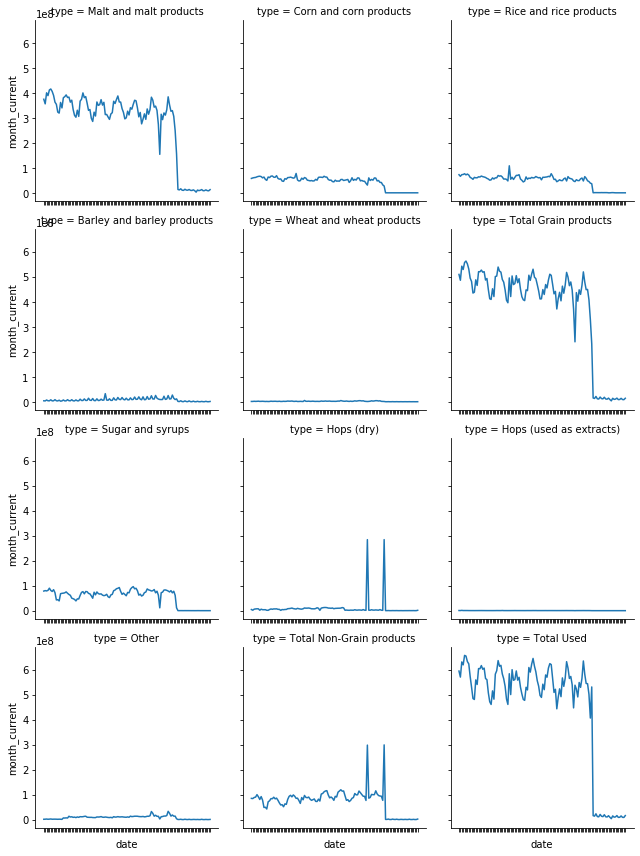

In [67]:
plt.figure(figsize=(10, 10))
g = sns.FacetGrid(brewing_raw, 
                  col="type", 
                  palette="tab20c",
                  col_wrap=3)
g.map(plt.plot, "date", "month_current")
g.set_xticklabels(rotation=30)
g.fig.tight_layout(w_pad=1)

It looks like from `2015` the data was collected differently. To maintain consistency, we will drop the data from 2015 onwards. Also, there are couple of spikes in *Non-Grain* products, which appear to be from the `month` of `December`. We need to remove these as well.

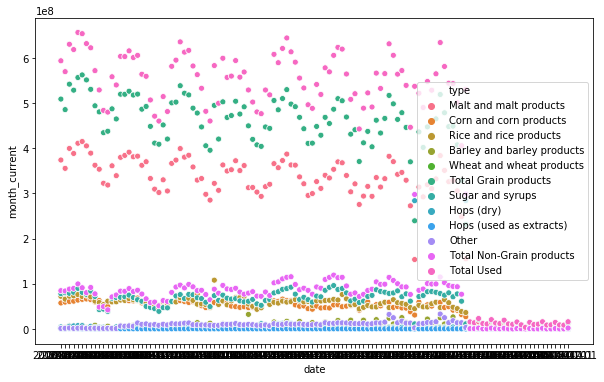

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(brewing_raw['date'], brewing_raw['month_current'], hue=brewing_raw['type'])

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [76]:
result = seasonal_decompose(brewing_raw['month_current'], model='additive', freq=30)

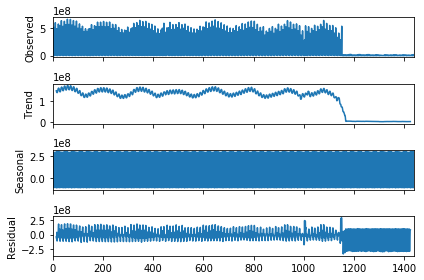

In [77]:
result.plot();

In [78]:
labels = 'Negative values', 'NaN values', 'Good values'

In [79]:
labels

('Negative values', 'NaN values', 'Good values')

In [80]:
type(labels)

tuple